# **LAB 2: UKŁADY RÓWNAŃ, FAKTORYZACJA LU I OBWODY ELEKTRYCZNE**

Importy:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from time import time
import random


## **Rozwiązywanie układów równań**

In [11]:
def solve(A: list[list], B: list):
    A = np.array(A).astype(float)
    Gauss = np.c_[A, B]
    result = [0]*len(B)
    
    already_satisfied = [] #tablica wierszy, ktore juz zrobilem, nie ruszac wiecej

    for change in range(len(Gauss)):
        
        #znajdz rzad z najw elementem
        maxi, max_index = 0, 0
        for r in range(len(Gauss)):
            if abs(Gauss[r][change]) > maxi and r not in already_satisfied:
                maxi = Gauss[r][change]
                max_index = r
        already_satisfied.append(max_index)

        for r in range(len(Gauss)):
            if r == max_index: continue
            #zmodyfikuj wspolczynniki
            Gauss[r] -=  (Gauss[r][change]/maxi)*Gauss[max_index]
        Gauss[max_index] /= maxi
    
    for i in range(len(B)):
        result[i] = Gauss[already_satisfied[i]][-1]

    return result
                
def ex_1_test():
    for i in range(10):
        print("TEST ", i, "WIELKOSC: ", 500 + i*50)

        A = np.random.rand(500 + i*50, 500 + i*50)
        B = np.random.rand(500 + i*50, 1)

        start = time()
        solve(A, B)
        end = time()
        print("\tCzas mojej implementacji: ", end - start)
    
        start = time()
        np.linalg.solve(A, B)
        end = time()
        print("\tCzas funkcji biblioteczej: ", end - start)

ex_1_test()



TEST  0 WIELKOSC:  500
	Czas mojej implementacji:  1.1693120002746582
	Czas funkcji biblioteczej:  0.0055408477783203125
TEST  1 WIELKOSC:  550
	Czas mojej implementacji:  1.352489709854126
	Czas funkcji biblioteczej:  0.0068204402923583984
TEST  2 WIELKOSC:  600
	Czas mojej implementacji:  1.6296420097351074
	Czas funkcji biblioteczej:  0.008398294448852539
TEST  3 WIELKOSC:  650
	Czas mojej implementacji:  1.9541711807250977
	Czas funkcji biblioteczej:  0.011584281921386719
TEST  4 WIELKOSC:  700
	Czas mojej implementacji:  2.330331563949585
	Czas funkcji biblioteczej:  0.012409210205078125
TEST  5 WIELKOSC:  750
	Czas mojej implementacji:  2.80292010307312
	Czas funkcji biblioteczej:  0.018938779830932617
TEST  6 WIELKOSC:  800
	Czas mojej implementacji:  3.176748752593994
	Czas funkcji biblioteczej:  0.01863551139831543
TEST  7 WIELKOSC:  850
	Czas mojej implementacji:  3.824056386947632
	Czas funkcji biblioteczej:  0.022439241409301758
TEST  8 WIELKOSC:  900
	Czas mojej implementa

In [16]:
A = np.matrix([
    [5, 5, 0],
    [10, 5, 0],
    [5, 5, 5]
], dtype=np.double)
B = np.array([3,
              4,
              5], dtype=np.double)

print(solve(A, B))
print(np.linalg.solve(A, B))


[np.float64(0.2), np.float64(0.4), np.float64(0.4)]
[0.2 0.4 0.4]


## **Faktoryzacja LU**

In [3]:
def LU_factorization(A: list[list]):
    Gauss = np.array(A).astype(float)
    
    for change in range(len(Gauss)):
        for r in range(change+1, len(Gauss)):
            #zmodyfikuj wspolczynniki
            factor = (Gauss[r][change]/Gauss[change][change])
            Gauss[r][change:] -=  factor*Gauss[change][change:] #= ta wartosc, na ktora mam zmienic
            Gauss[r][change] = factor

    L = np.tril(Gauss)
    for i in range(len(L)):
        L[i][i] = 1
    U = np.triu(Gauss)

    return L, U

def ex_2_test():
    tests = ""
    for i in range(10):
        print("TEST ", i, "WIELKOSC: ", 500 + i*50)

        A = np.random.rand(500 + i*50, 500 + i*50)
        L, U = LU_factorization(A)

        if np.linalg.det(A - np.matmul(L, U)) != 0:
            print("Wyznacznik różny od 0: ", np.det(A - np.matmul(L, U)))
            tests = tests + "W"
        else:
            tests = tests + "A"
    return len(tests), tests

print(ex_2_test())

TEST  0 WIELKOSC:  500
TEST  1 WIELKOSC:  550
TEST  2 WIELKOSC:  600
TEST  3 WIELKOSC:  650
TEST  4 WIELKOSC:  700
TEST  5 WIELKOSC:  750
TEST  6 WIELKOSC:  800
TEST  7 WIELKOSC:  850
TEST  8 WIELKOSC:  900
TEST  9 WIELKOSC:  950
(10, 'AAAAAAAAAA')


## **Układy elektryczne**

In [4]:
def make_nx_graph(L):
        graph = nx.Graph()
        for u, v, w in L:
            graph.add_edge(u, v, capacity=w)
        return graph

In [5]:
def make_nx_answer_graph(L):
        graph = nx.DiGraph()
        for u, v, r, i in L:
            graph.add_edge(u, v, resistance=r, intensity=i)
        return graph

In [6]:
def first_Kirchoffs_law(A, L, ver):
        for v in range(ver-1):
            for i, (e1, e2, _) in enumerate(L):
                if e1 == v:
                    A[v][i] = -1
                elif e2 == v:
                    A[v][i] = 1


In [7]:
def second_Kirchoffs_law(A, B, L, cycles, ver, edg, s, t, E):
        for cycle_ind in range(edg-ver+1):
            cycle = cycles[cycle_ind]
            for i in range(len(cycle)):
                a, b = cycle[(i-1)%len(cycle)], cycle[i]
                for k, (first, second, w) in enumerate(L):
                    if a == first and b == second:
                        A[cycle_ind + ver - 1][k] = w
                        break
                    elif a == second and b == first:
                        A[cycle_ind + ver - 1][k] = -w
                        break
                if a == s and b == t:
                    B[cycle_ind + ver -1] = E
                elif a == t and b == s:
                    B[cycle_ind + ver -1] = -E

In [ ]:
def electric_system(L, s=0, t=1, E=5):
    
    for i in range(len(L)):
        first, second, _ = L[i]
        if (s == first and t == second) or (s == second and t == first):
            del L[i]
            break
        
    L.append((s, t, 0))
             
    print(L)
    graph = make_nx_graph(L)
    edg = graph.number_of_edges()
    ver = graph.number_of_nodes()
    cycles = sorted(nx.cycle_basis(graph))

    A = np.zeros(shape=(edg, edg))
    B = np.zeros(shape=edg)

    first_Kirchoffs_law(A, L, ver)
    second_Kirchoffs_law(A, B, L, cycles, ver, edg, s, t, E)
    intensities = np.linalg.solve(A, B)
    result = [(v1, v2, r, i) if i >= 0 else (v2, v1, r, -i) for (v1, v2, r), i in zip(L, intensities)]
    return make_nx_answer_graph(result)

#### **Generowanie grafów**

In [30]:
MIN_RES = 10
MAX_RES = 50
GENERAL_E = 100

In [31]:
def erdos_renyi(n, p = 0.5):
    L = nx.erdos_renyi_graph(n, p).edges
    e = len(L)
    first = [u for (u, _) in L]
    second = [v for (_, v) in L]
    
    return list(zip(first, second, [random.randint(MIN_RES, MAX_RES) for _ in range(e)]))

In [32]:
def cubical(n):
    L = nx.random_regular_graph(3, n, 12112363).edges
    e = len(L)
    first = [u for (u, _) in L]
    second = [v for (_, v) in L]
    return list(zip(first, second, [random.randint(MIN_RES, MAX_RES) for _ in range(e)]))

In [33]:
def bridge(n):
    v1 = random.randint(int(n/3), int((2*n)/3))
    v2 = n-v1
    L1 = erdos_renyi(v1)
    L2 = [(first + v1, second + v1, wage) for (first, second, wage) in erdos_renyi(v2)]
    node1 = random.choice(L1)
    node2 = random.choice(L2)
    return L1 + L2 + [(node1[0], node2[1], random.randint(MIN_RES, MAX_RES))] + [(node1[1], node2[0], random.randint(MIN_RES, MAX_RES))]

In [75]:
def grid(m, n):
    L = nx.grid_2d_graph(m, n).edges
    e = len(L)
    first = [u for (u, _) in L]
    print(first)
    second = [v for (_, v) in L]
    print(second)
    return list(zip(first, second, [random.randint(MIN_RES, MAX_RES) for _ in range(e)]))



In [34]:
def draw_graph(graph, s, t, E):
    plt.figure(figsize=(12,10))
    pos = nx.kamada_kawai_layout(graph)
    node_options = {"node_color": "black", "node_size": 0}
    node_label_options = {"font_size": 10,
                        "font_color": "black",
                        "verticalalignment": "center",
                        "horizontalalignment": "right"}

    edge_options = {"width": 0.5, "alpha": 0.5, "edge_color": "black"}
    edge_label_options = {"label_pos": 0.3,
                        "font_size": 7,
                        "font_color": "black",
                        "rotate": False}

    edge_labels = {}
    for u, v, data in graph.edges(data=True):
        intensity = data.get('intensity', '')
        resistance = data.get('resistance', '')  # Assuming you have two weights in the edge data
        if u == s and v == t:
            edge_labels[(u, v)] = f"I = {float(intensity):.3f} A \n U = {E} V"

        else:
            edge_labels[(u, v)] = f"I = {float(intensity):.3f} A \n R = {resistance} \u03A9"
            
    nx.draw_networkx_nodes(graph, pos, **node_options)
    nx.draw_networkx_edges(graph, pos, **edge_options)
    nx.draw_networkx_labels(graph, pos, **node_label_options)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, **edge_label_options)
    plt.show()




[(0, 3, 37), (0, 4, 25), (0, 7, 21), (0, 8, 48), (1, 2, 17), (1, 3, 31), (1, 5, 42), (1, 8, 47), (1, 9, 33), (2, 10, 21), (2, 11, 19), (3, 4, 47), (3, 5, 32), (3, 6, 41), (3, 8, 42), (3, 10, 27), (4, 5, 17), (4, 7, 42), (4, 8, 37), (5, 8, 48), (6, 8, 11), (6, 10, 46), (6, 11, 18), (7, 9, 39), (8, 9, 17), (8, 11, 22), (9, 11, 37), (10, 11, 43), (0, 1, 0)]


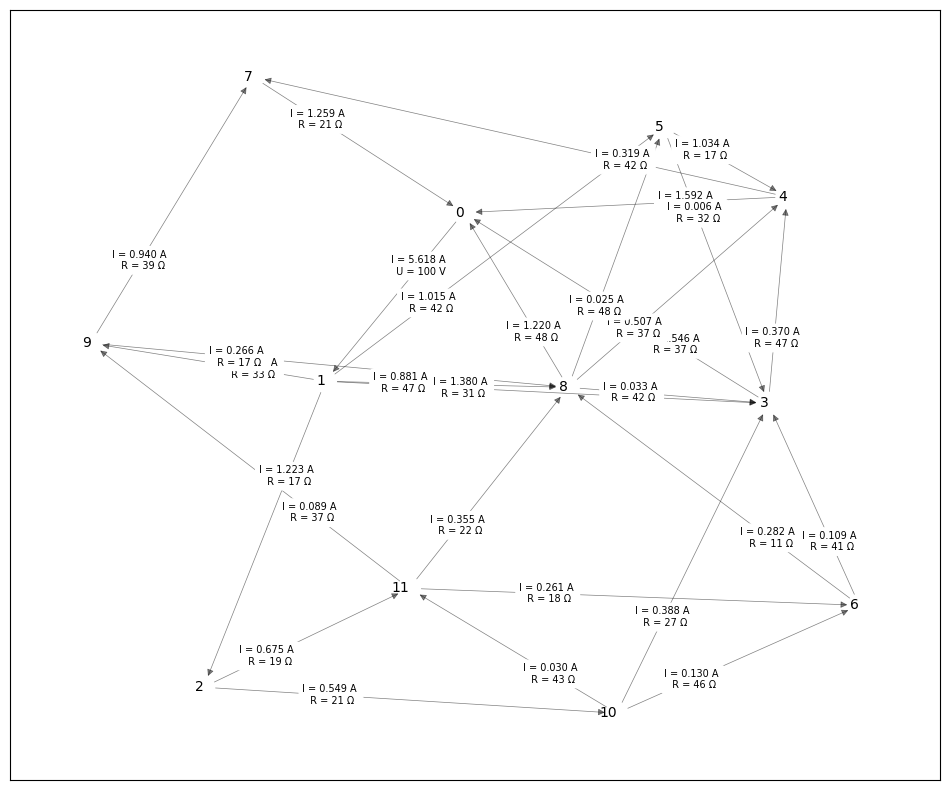

In [36]:
graph1 = electric_system(erdos_renyi(12), 0, 1, GENERAL_E)
draw_graph(graph1, 0, 1, GENERAL_E)

[(0, 6, 29), (0, 2, 17), (0, 11, 34), (1, 4, 40), (1, 7, 45), (1, 10, 47), (2, 10, 46), (2, 6, 42), (3, 10, 31), (3, 9, 15), (3, 11, 25), (4, 5, 37), (4, 7, 16), (5, 8, 15), (5, 9, 35), (6, 7, 36), (8, 9, 21), (8, 11, 45), (0, 1, 0)]


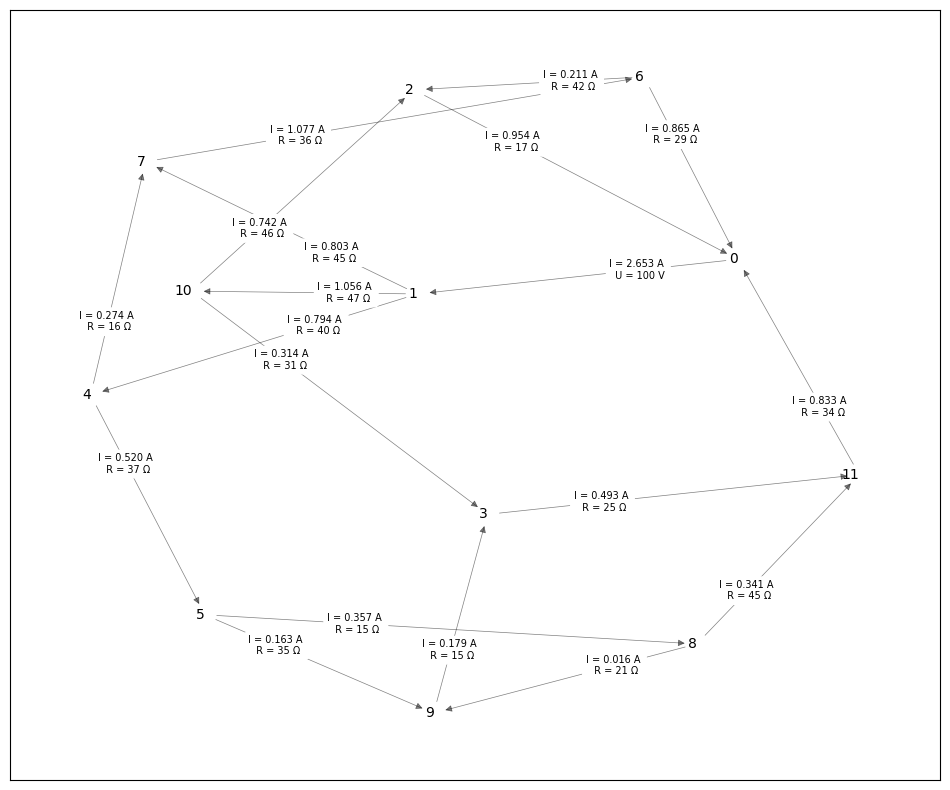

In [37]:
graph2 = electric_system(cubical(12), 0, 1, GENERAL_E)
draw_graph(graph2, 0, 1, GENERAL_E)

[(0, 2, 19), (0, 3, 30), (0, 4, 11), (0, 5, 17), (1, 2, 34), (2, 3, 21), (2, 4, 30), (2, 5, 35), (3, 5, 11), (4, 5, 19), (6, 7, 47), (6, 8, 44), (6, 10, 50), (6, 11, 10), (7, 8, 20), (7, 11, 28), (8, 10, 16), (8, 11, 41), (9, 10, 38), (9, 11, 11), (0, 10, 19), (1, 9, 48), (0, 1, 0)]


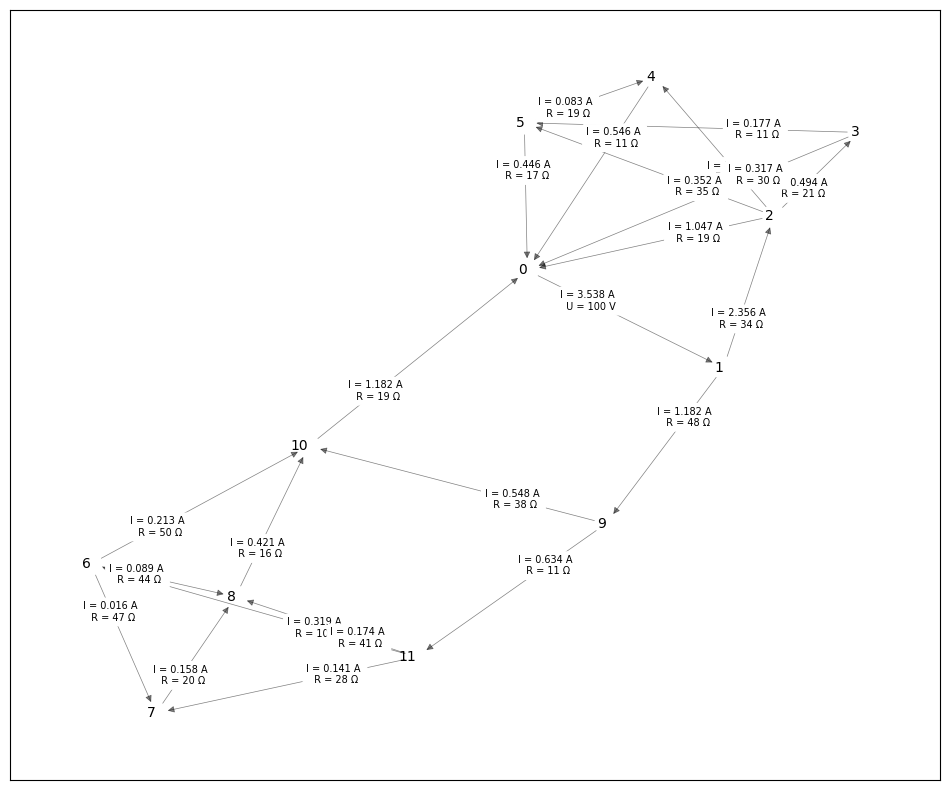

In [39]:
graph = electric_system(bridge(12), 0, 1, GENERAL_E)
draw_graph(graph, 0, 1, GENERAL_E)

In [76]:
graph4 = electric_system(grid(10, 10), 0, 1, GENERAL_E)
draw_graph(graph4, 0, 1, GENERAL_E)

[(0, 0), (0, 0), (0, 1), (0, 1), (0, 2), (0, 2), (0, 3), (0, 3), (0, 4), (0, 4), (0, 5), (0, 5), (0, 6), (0, 6), (0, 7), (0, 7), (0, 8), (0, 8), (0, 9), (1, 0), (1, 0), (1, 1), (1, 1), (1, 2), (1, 2), (1, 3), (1, 3), (1, 4), (1, 4), (1, 5), (1, 5), (1, 6), (1, 6), (1, 7), (1, 7), (1, 8), (1, 8), (1, 9), (2, 0), (2, 0), (2, 1), (2, 1), (2, 2), (2, 2), (2, 3), (2, 3), (2, 4), (2, 4), (2, 5), (2, 5), (2, 6), (2, 6), (2, 7), (2, 7), (2, 8), (2, 8), (2, 9), (3, 0), (3, 0), (3, 1), (3, 1), (3, 2), (3, 2), (3, 3), (3, 3), (3, 4), (3, 4), (3, 5), (3, 5), (3, 6), (3, 6), (3, 7), (3, 7), (3, 8), (3, 8), (3, 9), (4, 0), (4, 0), (4, 1), (4, 1), (4, 2), (4, 2), (4, 3), (4, 3), (4, 4), (4, 4), (4, 5), (4, 5), (4, 6), (4, 6), (4, 7), (4, 7), (4, 8), (4, 8), (4, 9), (5, 0), (5, 0), (5, 1), (5, 1), (5, 2), (5, 2), (5, 3), (5, 3), (5, 4), (5, 4), (5, 5), (5, 5), (5, 6), (5, 6), (5, 7), (5, 7), (5, 8), (5, 8), (5, 9), (6, 0), (6, 0), (6, 1), (6, 1), (6, 2), (6, 2), (6, 3), (6, 3), (6, 4), (6, 4), (6, 5),

LinAlgError: Singular matrix